# Reading_Handwritten_Digits

Here is the code that load the <code>mnist</code> dataset from <code>tensorflow.keras.datasets</code> and design a fully-connected Neural Network to classify them in 10 classes. Then we use the trained model to read and predict the digits of the test set.

### By: ZaraPhCode

Importing necessary modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Loading the <code>mnist</code> dataset from <code>tensorflow.keras.datasets</code> as train and test sets, and normalizing the data:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Lets plot 16 first data of the training set along with their labels:

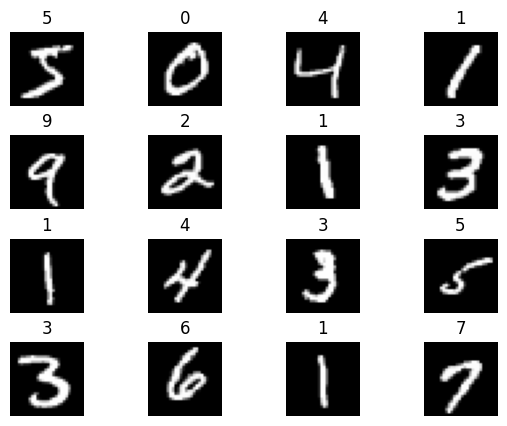

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i] , cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

We should know the dimension of our data for NN design.

In [6]:
x_train.shape

(60000, 28, 28)

Now, we can design the network architecture:

(the mnist dataset is a small and easy dataset. We do not need a deep network with large number of weights)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Defining the loss function:

(as the problem is non-binary and the labels are digits, we should use <code>SparseCategoricalCrossentropy</code> loss function)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

We should compile the model before training:

In [19]:
EPOCHS = 10

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Now, we han train the model and keep the metrics of each epoch at variable <code>history</code>:

In [20]:
history = model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9864
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0366 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0325 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0263 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0259 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.025

Lets see how the model has performed on the data:

In [21]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0797 - accuracy: 0.9798 - 388ms/epoch - 1ms/step


[0.07972414046525955, 0.9797999858856201]

Lets plot the <code>loss</code> and <code>accuracy</code> as a function of epochs:

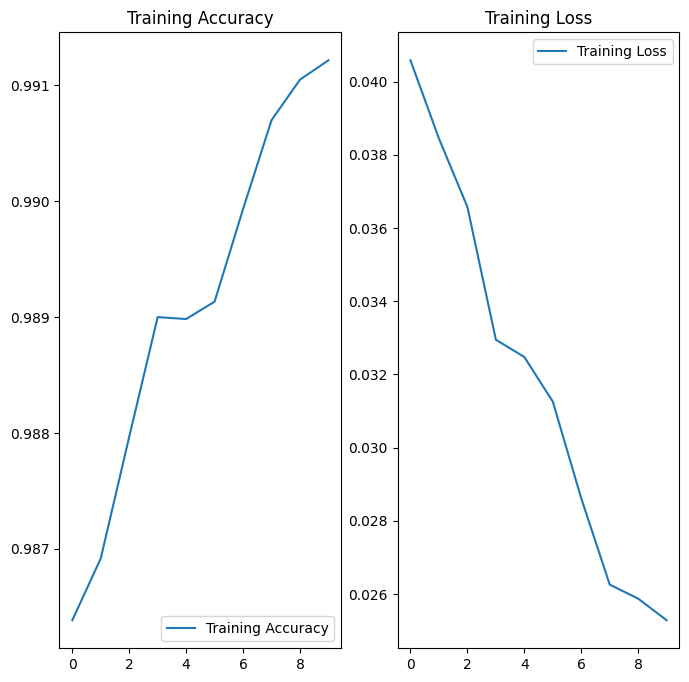

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

We should use <code>softmax</code> activation function to have the model output as probabilities:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Now we can predict the label of each data by simply using <code>np.argmax(probability_model(data))</code>. 

Lets plot the first 16 of our test set along with their actual and predicted labels:

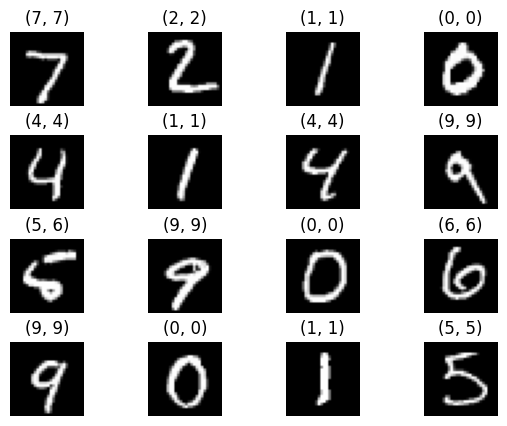

In [24]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i] , cmap='gray')
    prediction = np.argmax(probability_model(x_test[i:i+1]))
    plt.title('({}, {})'.format(y_test[i:i+1][0],prediction))
    plt.axis('off')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()